Your first task is parsing. As this is the first assignment and as the parsers are very different for the two datasets (images vs. text), you may use any library/package to aid in the parsing here, however you are encouraged to write your own.

In [2]:
#FIRST: PARSING
%pip install scikit-learn
%pip install torch
%pip install torchvision
import sklearn
import pandas as pd
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [3]:
# FIRST TASK: Parse the 20 newsgroups dataset
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')
print(newsgroups_train.target_names)
print(newsgroups_train.data[0])
print(newsgroups_train.target[0])


['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have o

In [47]:
# Parse the MNIST dataset
mnist_train = torchvision.datasets.MNIST(root='data', train=True, download=True, transform=torchvision.transforms.ToTensor())
mnist_test = torchvision.datasets.MNIST(root='data', train=False, download=True, transform=torchvision.transforms.ToTensor())
# print(mnist_train)
# print(mnist_test)

# convert to numpy, tensor to numpy
train_images = mnist_train.data.numpy().astype(np.float64)
train_labels = mnist_train.targets.numpy()
print(train_images.shape, train_labels.shape)

test_images = mnist_test.data.numpy().astype(np.float64) 
test_labels = mnist_test.targets.numpy()
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
   18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
  253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.  

Text(0.5, 1.0, 'Label: 5')

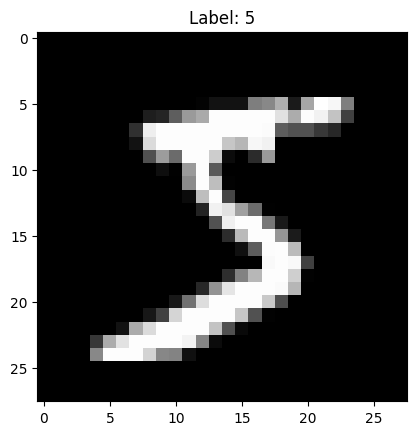

In [65]:
# VISUALIZATION:
print(train_images[0])
print(type(train_images[0]))
plt.imshow(train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")

In [52]:
%pip install tqdm
from tqdm import tqdm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [60]:
# SECOND TASK: normalization

# 1. Shift and scale normalization:
    # Subtract the minimum, then divide by new maximum
    # This will shift the minimum to 0 and the maximum to 1
# 3. Term-Frequency (TF) weighting:
    # Map each term in a document with its frequency (text only), up to me to determine appropriate normalization

# MNIST Dataset: 
    # Make sure any value transformation retains the 0 values
    # <0, 255> -> <0, 1> essentially black and white

# 1. Shift and scale normalization:
    # Subtract the minimum, then divide by new maximum
    # This will shift the minimum to 0 and the maximum to 1
shift_scale_train_images = train_images / 255.0

# for image in tqdm(shift_scale_train_images):
#     for col in image:
#         for pixel in col:
#             pixel = (pixel - 0.0) / (255.0 - 0.0)


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Text(0.5, 1.0, 'Label: 5')

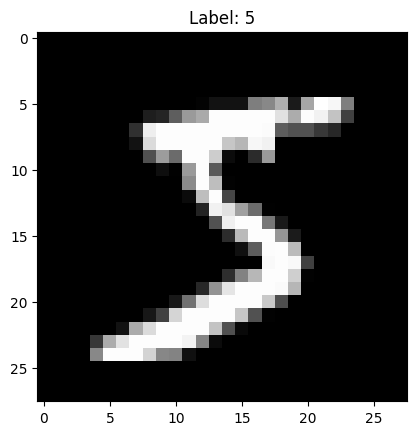

In [61]:
# Visualize the first image after normalization:
print(shift_scale_train_images[0])
print(type(shift_scale_train_images[0]))
plt.imshow(shift_scale_train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")

In [82]:
# 2. Zero mean, unit variance
    # Subtract the mean, divide by the appropriate value to get variance = 1
mean = np.mean(train_images, axis=0)
print(mean.shape)
std = np.std(train_images, axis=0)
print(std.shape)
zero_mean_unit_variance_train_images = (train_images - mean) / std
# replace nan with 0
zero_mean_unit_variance_train_images = np.nan_to_num(zero_mean_unit_variance_train_images)

(28, 28)
(28, 28)


C:\Users\koola\AppData\Local\Temp\ipykernel_39484\2750537632.py:7: RuntimeWarning: invalid value encountered in divide
  zero_mean_unit_variance_train_images = (train_images - mean) / std


In [83]:
# Zero mean from class notes:

# mew = np.sum(train_images, axis=0) / train_images.shape[0]
print(train_images[0][6])
print(np.mean(train_images[0][6]))

[  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.]
103.57142857142857


In [84]:
print(mean) # Mean = pixel value for that specific spot across all images

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.10000000e-03 7.83333333e-03 3.60000000e-03 1.50000000e-04
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.66666667e-04 9.16666667e-04 9.28333333e-03 2.42833333e-02
  4.37166667e-02 6.41000000e-02 1.20133333e-01 1.60733333e-01
  1.74183333e-01 1.77433333e-01 1.89316667e-01 1.74150000e-01
  1.86933333e-01 1.53650000e-01 1.00116667e-01 7.12333333e-02
  5.38166667e-02 2.13666667e-02 1.00833333e-02 3.53333333e-03
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.06666667e-03 7.00000000e-04
  6.95000000e-03 5.48333333e-03 4.71000000e-02 1.38400000e-01
  2.64

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -4.41807799e-03 -5.75481961e-03 -4.08251693e-03 -4.08251693e-03
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -4.08251693e-03 -4.70968827e-03 -8.79934640e-03 -1.15905591e-02
  -1.47589798e-02 -1.92848546e-02 -2.46717975e-02 -2.90710271e-02
  -3.05926583e-02 -3.11640127e-02 -3.19628719e-02 -3.02025355e-02
  -3.13102175e-02 -2.83833960e-02 -2.31191906e-02 -1.91666260e-02
  -1.67723008e-02 -1.09963601e-02 -8.32486080e-03 -4.38069356e-03
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -4.08251693e-03 -5.39534598e-03
  -8.522

Text(0.5, 1.0, 'Label: 5')

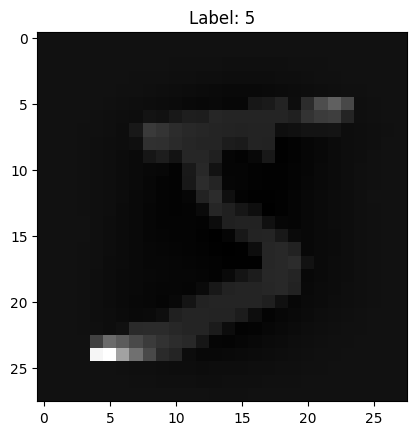

In [85]:
# Visualize:
print(zero_mean_unit_variance_train_images[0])
print(np.var(zero_mean_unit_variance_train_images[0])) # Should be close to 1
plt.imshow(zero_mean_unit_variance_train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")



In [86]:
# Pairwise similarities metrics:

# 1. Euclidean distance(required, library)
    # a. required(your own, use batches)

# 2. Edit distance(required for text) OR cosine similarity(required for vectors)




In [ ]:
# 1. Euclidean distance (library)

euclidean_distance = np.linalg.norm(train_images[0] - train_images[11])
#check:
    # zero_mean_unit_variance_train_images[0] - zero_mean_unit_variance_train_images[1])
    # shift_scale_train_images[0] - shift_scale_train_images[1])

print(euclidean_distance)
print(type(euclidean_distance))

print(train_labels[0]) # 5
print(train_labels[11]) # 5

print("\n")

for i in range(12):
    print(train_labels[i]) # 5, 0, 4, 1, 9, 2, 1, 3, 1, 4, ...
# The distance between 5 and 0 is: 2387.111


distances = []
for i in range(len(shift_scale_train_images)):
    distances.append(np.linalg.norm(shift_scale_train_images[0] - shift_scale_train_images[i]))


2867.4593283950862
<class 'numpy.float64'>
5
5


5
0
4
1
9
2
1
3
1
4
3
5


In [126]:
# try with normalized:
SS_euclidean_distance = np.linalg.norm(shift_scale_train_images[0] - shift_scale_train_images[10])
print(SS_euclidean_distance)

8.391501715310692


In [125]:
ZM_euclidean_distance = np.linalg.norm(zero_mean_unit_variance_train_images[0] - zero_mean_unit_variance_train_images[11])
print(ZM_euclidean_distance)

41.07952550854942


In [117]:
# I will be using the shift and scale normalization for the rest of the tasks: 

distances = []
for i in range(len(shift_scale_train_images)):
    distances.append(np.linalg.norm(shift_scale_train_images[0] - shift_scale_train_images[i]))

In [118]:
print(distances[:10]) # first 10 distances

[np.float64(0.0), np.float64(9.361222132577327), np.float64(10.875094558710726), np.float64(10.018901014936581), np.float64(10.480263577046502), np.float64(10.126636833057416), np.float64(9.50428139627975), np.float64(8.509666575199573), np.float64(9.3143710818562), np.float64(10.07571719003181)]


In [133]:
# zip together labels and distances
predictions = list(zip(train_labels, distances))

# create a function to get the top k predictions
def get_top_k_predictions(k, predictions):
    return sorted(predictions, key=lambda x: x[1])[:k]

def print_pred(predictions):
    for label, distance in predictions:
        print(f"Label: {label}, Distance: {distance}")

print_pred(get_top_k_predictions(20, predictions)) # top 5 predictions

# Create a final prediction that is the most common label among the top k predictions
def final_prediction(k, predictions):
    top_k = get_top_k_predictions(k, predictions)
    labels = [label for label, distance in top_k]
    return max(set(labels), key=labels.count)

print(final_prediction(20, predictions)) # final prediction for k=5


Label: 5, Distance: 0.0
Label: 5, Distance: 6.123421106197849
Label: 5, Distance: 6.241574097341995
Label: 5, Distance: 6.253800382437516
Label: 3, Distance: 6.261605603114141
Label: 5, Distance: 6.2919488047527965
Label: 5, Distance: 6.293676607845121
Label: 5, Distance: 6.29689878083294
Label: 5, Distance: 6.31252698404212
Label: 5, Distance: 6.3282538970573015
Label: 5, Distance: 6.468091021389275
Label: 5, Distance: 6.486331412605749
Label: 5, Distance: 6.49174911813767
Label: 5, Distance: 6.530390317063363
Label: 5, Distance: 6.547765525107026
Label: 5, Distance: 6.59808320936299
Label: 5, Distance: 6.603753898481597
Label: 3, Distance: 6.6060135943987435
Label: 3, Distance: 6.626704912177665
Label: 5, Distance: 6.634280041175857
5


In [147]:
# Now lets test it on random images from the test set

# Get a random image from the test set
random_index = np.random.randint(0, len(test_images))
random_image = test_images[random_index]

# Normalize the random image
normalized_random_image = random_image / 255.0

# Calculate distances from the random image to all training images
test_distances = []
for i in range(len(shift_scale_train_images)):
    test_distances.append(np.linalg.norm(normalized_random_image - shift_scale_train_images[i]))

print_pred(get_top_k_predictions(20, list(zip(train_labels, test_distances))))
# Final prediction for the random image
print("Predicted: ", final_prediction(20, list(zip(train_labels, test_distances))))
print("Actual: ", test_labels[random_index]) # actual label of the random image


Label: 9, Distance: 3.5446078092417994
Label: 9, Distance: 3.8222079164275438
Label: 9, Distance: 4.022923548773603
Label: 9, Distance: 4.091679087454162
Label: 9, Distance: 4.149949856795589
Label: 9, Distance: 4.2025385492096605
Label: 9, Distance: 4.22849854240326
Label: 9, Distance: 4.404670548989616
Label: 9, Distance: 4.492471381736864
Label: 9, Distance: 4.496329401339696
Label: 9, Distance: 4.499903882095359
Label: 9, Distance: 4.51275777091591
Label: 9, Distance: 4.562918253832436
Label: 9, Distance: 4.623251667221872
Label: 9, Distance: 4.645633933944024
Label: 9, Distance: 4.649082044883035
Label: 9, Distance: 4.652193737839651
Label: 9, Distance: 4.66227013197914
Label: 9, Distance: 4.662558745595841
Label: 9, Distance: 4.674580536377607
Predicted:  9
Actual:  9


In [ ]:
# Calculate accuracy metrics:



In [172]:
zero_mean_unit_variance_train_images = np.nan_to_num((train_images - mean) / std)
zero_mean_unit_variance_test_images = np.nan_to_num((test_images - mean) / std)

print(zero_mean_unit_variance_train_images.shape)
print(zero_mean_unit_variance_train_images[0])

C:\Users\koola\AppData\Local\Temp\ipykernel_39484\2834081449.py:1: RuntimeWarning: invalid value encountered in divide
  zero_mean_unit_variance_train_images = np.nan_to_num((train_images - mean) / std)
C:\Users\koola\AppData\Local\Temp\ipykernel_39484\2834081449.py:2: RuntimeWarning: divide by zero encountered in divide
  zero_mean_unit_variance_test_images = np.nan_to_num((test_images - mean) / std)
C:\Users\koola\AppData\Local\Temp\ipykernel_39484\2834081449.py:2: RuntimeWarning: invalid value encountered in divide
  zero_mean_unit_variance_test_images = np.nan_to_num((test_images - mean) / std)


(60000, 28, 28)


KeyboardInterrupt: 

Exception ignored in: 'zmq.backend.cython._zmq.Frame.__del__'
Traceback (most recent call last):
  File "_zmq.py", line 160, in zmq.backend.cython._zmq._check_rc
KeyboardInterrupt: 


[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -4.41807799e-03 -5.75481961e-03 -4.08251693e-03 -4.08251693e-03
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -4.08251693e-03 -4.70968827e-03 -8.79934640e-03 -1.15905591e-02
  -1.47589798e-02 -1.92848546e-02 -2.46717975e-02 -2.90710271e-02
  -3.05926583e-02 -3.11640127e-02 -3.19628719e-02 -3.02025355e-02
  -3.13102175e-02 -2.83833960e-02 -2.31191906e-02 -1.91666260e-02
  -1.67723008e-02 -1.09963601e-02 -8.32486080e-03 -4.38069356e-03
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -4.08251693e-03 -5.39534598e-03
  -8.522

In [170]:
# 1a. Euclidean distance (your own)

zero_mean_unit_variance_train_images = np.nan_to_num((train_images - mean) / std)
zero_mean_unit_variance_test_images = np.nan_to_num((test_images - mean) / std)

print(zero_mean_unit_variance_train_images.shape)
# convert nan to 0
# zero_mean_unit_variance_train_images = np.nan_to_num(zero_mean_unit_variance_train_images)
# zero_mean_unit_variance_test_images = np.nan_to_num(zero_mean_unit_variance_test_images)
# subtract between test data and each row of training data -> power by 2 -> sum along axis you want to eliminate -> sqrt

selfimplemented_euclidean_distances = []

# for i in tqdm(range(len(zero_mean_unit_variance_train_images))):
#     distances = []
#     for j in range(len(zero_mean_unit_variance_train_images)):
#         distance = np.sqrt(np.sum((zero_mean_unit_variance_train_images[i] - zero_mean_unit_variance_train_images[j]) ** 2))
#         distances.append(distance)
#     selfimplemented_euclidean_distances.append(distances)

for i in tqdm(range(len(zero_mean_unit_variance_test_images))):
    distances = []
    for j in range(len(zero_mean_unit_variance_train_images)):
        distance = np.sqrt(np.sum((zero_mean_unit_variance_test_images[i] - zero_mean_unit_variance_train_images[j]) ** 2))
        distances.append(distance)
    selfimplemented_euclidean_distances.append(distances)



C:\Users\koola\AppData\Local\Temp\ipykernel_39484\3951521152.py:3: RuntimeWarning: invalid value encountered in divide
  zero_mean_unit_variance_train_images = np.nan_to_num((train_images - mean) / std)
C:\Users\koola\AppData\Local\Temp\ipykernel_39484\3951521152.py:4: RuntimeWarning: divide by zero encountered in divide
  zero_mean_unit_variance_test_images = np.nan_to_num((test_images - mean) / std)
C:\Users\koola\AppData\Local\Temp\ipykernel_39484\3951521152.py:4: RuntimeWarning: invalid value encountered in divide
  zero_mean_unit_variance_test_images = np.nan_to_num((test_images - mean) / std)


(60000, 28, 28)


  0%|          | 18/10000 [00:06<1:01:38,  2.70it/s]


KeyboardInterrupt: 

In [158]:
print(len(selfimplemented_euclidean_distances))
sorted_selfimplemented_euclidean_distances = sorted(selfimplemented_euclidean_distances, key=lambda x: x[0])

10000


In [160]:
print(sorted_selfimplemented_euclidean_distances[:5])

[[np.float64(19.41987726473951), np.float64(35.42118747614238), np.float64(55.92332796571159), np.float64(33.36727377776771), np.float64(37.59566998284846), np.float64(36.89765272092678), np.float64(33.6375452947412), np.float64(30.30338616652208), np.float64(33.05671898833218), np.float64(37.248524843384345), np.float64(32.725955627852024), np.float64(39.47041958227496), np.float64(56.12079389443624), np.float64(38.8202166359831), np.float64(32.8479349322177), np.float64(37.17579607157164), np.float64(38.931175939264016), np.float64(32.20801711138197), np.float64(32.71388265383128), np.float64(35.634017503450856), np.float64(56.86578844405961), np.float64(36.99353769475058), np.float64(33.3277302175218), np.float64(33.413913409820225), np.float64(34.91879516636069), np.float64(37.91630719651911), np.float64(33.151992791655125), np.float64(31.453652774899666), np.float64(54.033326630455285), np.float64(40.37877511566695), np.float64(43.351758165869754), np.float64(33.322571322669916), 

In [167]:
#implement a knn classifier for the MNIST dataset
class KNNClassifier:
    def __init__(self, k):
        self.k = k
        self.train_images = None
        self.train_labels = None
        # introduce normalization
        self.norm = None


    def fit(self, train_images, train_labels, norm):
        self.train_images = train_images
        self.train_labels = train_labels
        self.norm = norm

    def predict_library(self, test_image): #uses numpy library euclidean distance
        distances = np.linalg.norm(self.train_images - test_image, axis=1)
        top_k_indices = np.argsort(distances)[:self.k]
        top_k_labels = self.train_labels[top_k_indices]
        most_common = np.bincount(top_k_labels).argmax()
        return most_common
    
    def predict_own(self, test_image):
        if self.norm == "Shift and Scale":
            # self.test_images = self.test_images / 255.0
            # self.test_images = np.nan_to_num(self.test_images)
        
            self.train_images = self.train_images / 255.0
            self.train_images = np.nan_to_num(self.train_images)

        if self.norm == "Zero Mean Unit Variance":
            self.train_images = (self.train_images - np.mean(self.train_images, axis=0)) / np.std(self.train_images, axis=0)
            
        distances = []
        for i in range(len(self.train_images)):
            distance = np.sqrt(np.sum((test_image - self.train_images[i]) ** 2))
            distances.append(distance)
        top_k_indices = np.argsort(distances)[:self.k]
        top_k_labels = self.train_labels[top_k_indices]
        most_common = np.bincount(top_k_labels).argmax()
        return most_common
    


In [169]:
# Test the KNN classifier

knn = KNNClassifier(k = 12)
knn.fit(train_images, train_labels, "Shift and Scale")

# knn.predict_own(test_images[0])
# normalize test_images = test_images / 255.0
test_images = test_images / 255.0

for image in tqdm(range(len(test_images))):
    knn.predict_own(test_images[image])
    
correct = 0
# accuracy metric
for i in tqdm(range(len(test_images))):
    prediction = knn.predict_own(test_images[i])
    if prediction == test_labels[i]:
        correct += 1


knn.predict_library(test_images[0])



  0%|          | 14/10000 [00:13<2:38:29,  1.05it/s]


KeyboardInterrupt: 

In [103]:
print(newsgroups_test.data[0])


From: v064mb9k@ubvmsd.cc.buffalo.edu (NEIL B. GANDLER)
Subject: Need info on 88-89 Bonneville
Organization: University at Buffalo
Lines: 10
News-Software: VAX/VMS VNEWS 1.41
Nntp-Posting-Host: ubvmsd.cc.buffalo.edu


 I am a little confused on all of the models of the 88-89 bonnevilles.
I have heard of the LE SE LSE SSE SSEI. Could someone tell me the
differences are far as features or performance. I am also curious to
know what the book value is for prefereably the 89 model. And how much
less than book value can you usually get them for. In other words how
much are they in demand this time of year. I have heard that the mid-spring
early summer is the best time to buy.

			Neil Gandler



In [18]:
print(newsgroups_train.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [86]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)
print(X_train.shape)
print(X_test.shape)



(11314, 130107)
(7532, 130107)


In [ ]:
#For 20NG, try TF normalization on e.g. the rows. Note for text is critical to maintain a sparse format due to large number of columns

